<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-2-Regression/blob/main/Capstone_Project_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - RETAIL SALES PREDICTION



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [144]:
# Import Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Loading

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
# Load Dataset
filename='/content/drive/MyDrive/AlmaBetter/Retail Sales Prediction/'
df=pd.read_csv(filename + 'Rossmann Stores Data.csv')
store=pd.read_csv(filename + 'store.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Dataset First View

In [147]:
# Dataset First Look
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [148]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [149]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [150]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Dataset Rows & Columns count

In [151]:
# Dataset Rows & Columns count
df.shape

(1017209, 9)

In [152]:
store.shape

(1115, 10)

### Dataset Information

In [153]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [154]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [155]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

In [156]:
len(store[store.duplicated()])

0

#### Missing Values/Null Values

In [157]:
# Missing Values/Null Values Count
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [158]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

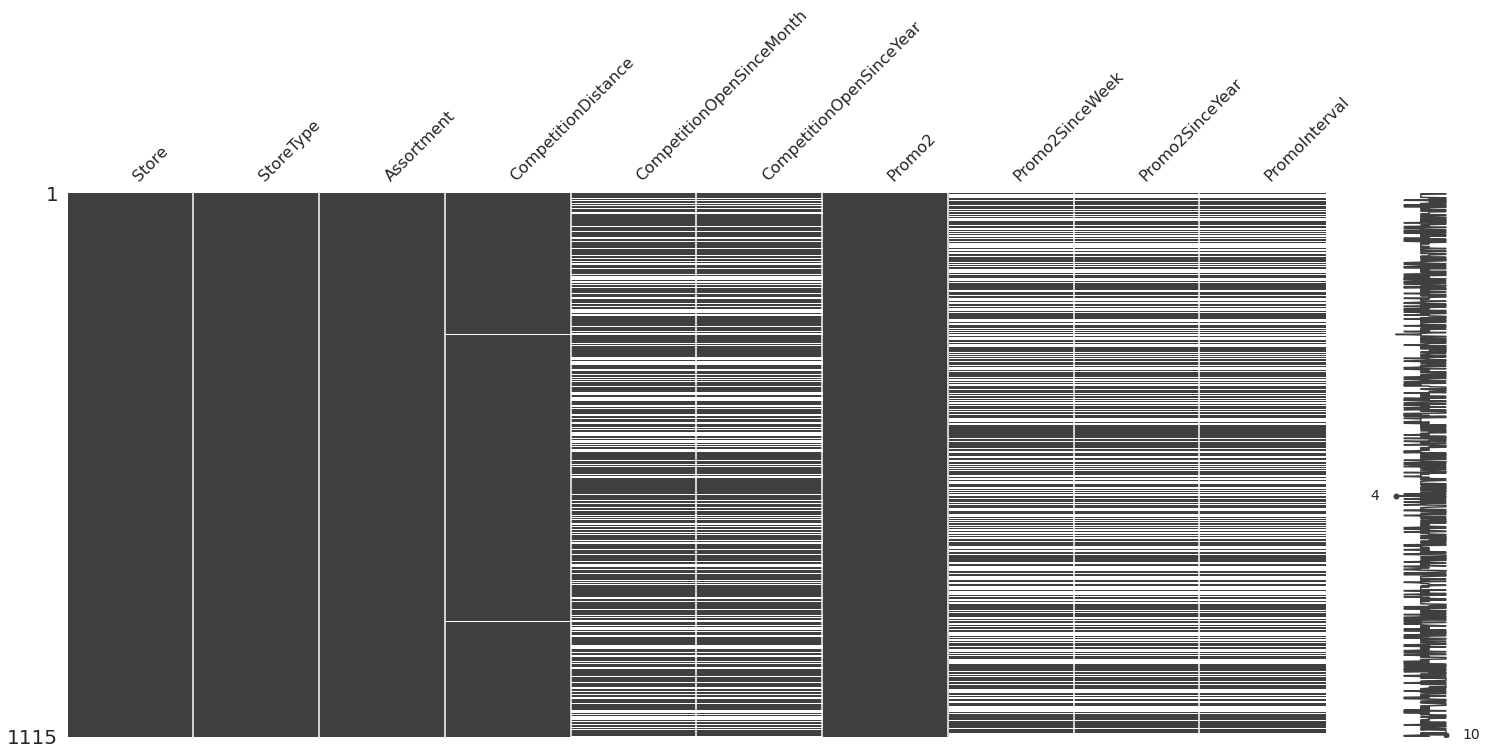

In [159]:
# Visualizing the missing values
import missingno as msno
msno.matrix(store)

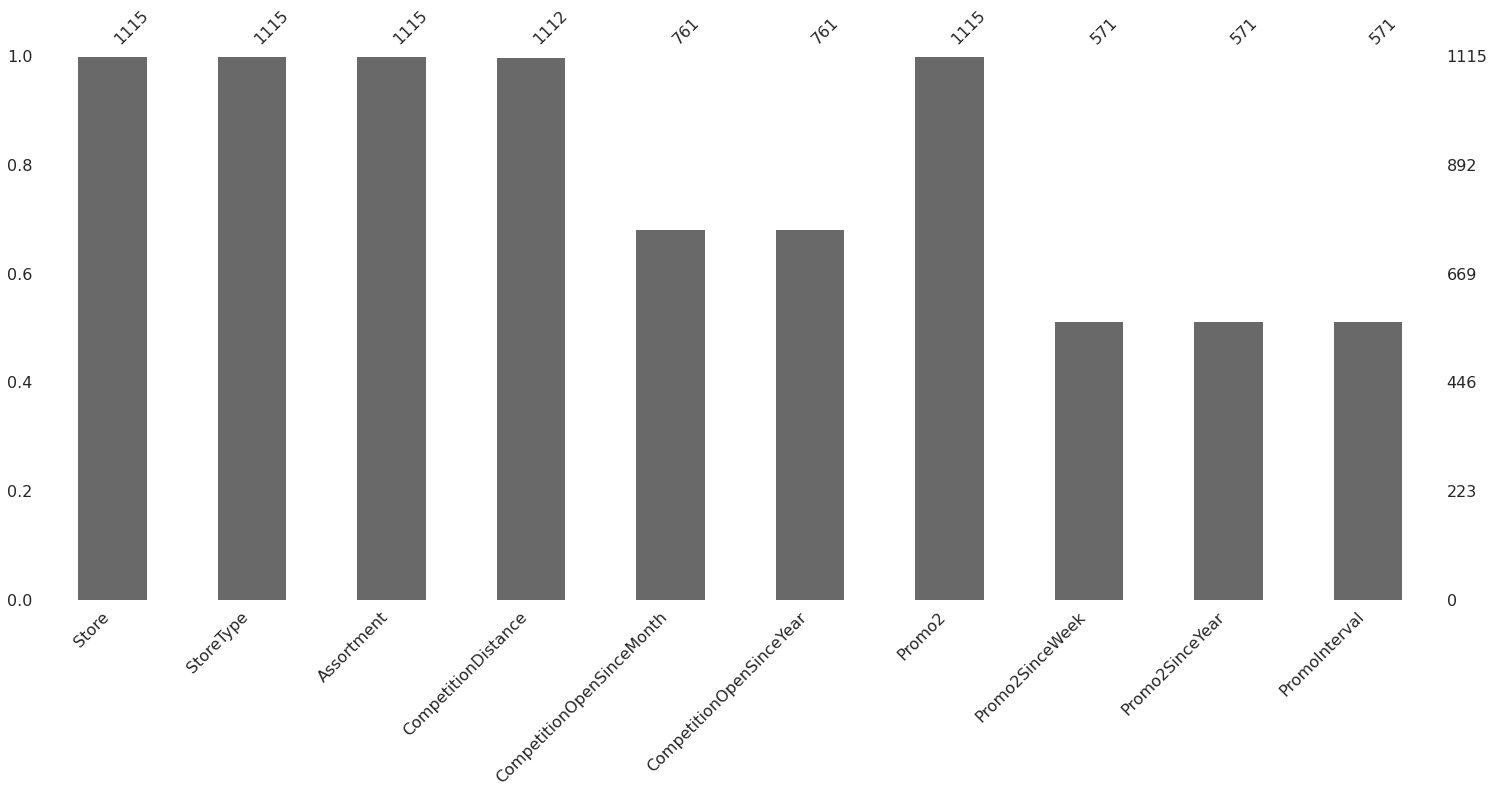

In [160]:
msno.bar(store)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [161]:
# Dataset Columns
list(store.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [162]:
# Dataset Describe
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [163]:
# Check Unique Values for each variable.
for col in list(store.columns):
  print(col)
  print('Unique Values:')
  print(store[col].unique())
  print('length:',len(store[col].unique()))
  print("-"*50)

Store
Unique Values:
[   1    2    3 ... 1113 1114 1115]
length: 1115
--------------------------------------------------
StoreType
Unique Values:
['c' 'a' 'd' 'b']
length: 4
--------------------------------------------------
Assortment
Unique Values:
['a' 'c' 'b']
length: 3
--------------------------------------------------
CompetitionDistance
Unique Values:
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02


## 3. ***Data Wrangling***

### Data Wrangling Code

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


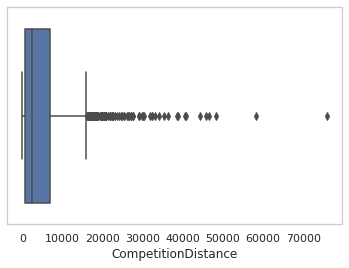

In [164]:
# Write your code to make your dataset analysis ready.
sns.boxplot(store['CompetitionDistance'])

In [165]:
store_df=store.copy()
store_df['CompetitionDistance']=store_df['CompetitionDistance'].fillna(0) #Filling the 3 null values with 0
store_df['CompetitionDistance'].isnull().sum()
#CompetitionDistance contains many outlier which needs to be fixed

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0

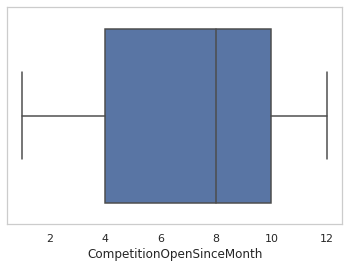

In [166]:
sns.boxplot(store_df['CompetitionOpenSinceMonth'])
#No outlier is present in CompetitionOpenSinceMonth,So only the null values has to be taken care
store_df['CompetitionOpenSinceMonth']=store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceMonth'].isnull().sum()

In [167]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


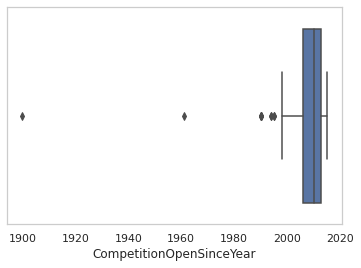

In [168]:
sns.boxplot(store_df['CompetitionOpenSinceYear'])

In [169]:
store_df['CompetitionOpenSinceYear']=store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['CompetitionOpenSinceYear'].isnull().sum()

0

In [170]:
store_df['Promo2SinceWeek']=store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear']=store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval']=store_df['PromoInterval'].fillna(0)

In [171]:
import datetime as dt
df1=df.copy()
df1['year'] = pd.DatetimeIndex(df1['Date']).year
df1['month'] = pd.DatetimeIndex(df1['Date']).month

In [172]:
store_df.isnull().sum()
#The data has been cleaned

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [173]:
#Merging of rossman stores data and store
dff = pd.merge(df1, store_df, how='left', on='Store')

In [174]:
dff.isnull().sum()


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
year                         0
month                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Sales of each day of the week

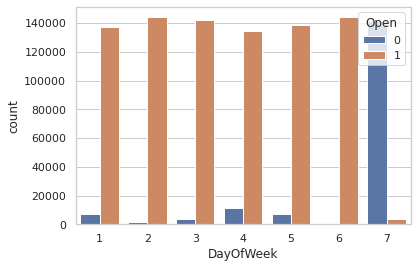

In [175]:
# Chart - 1 visualization code
sns.set_style("whitegrid")
sns.countplot(x='DayOfWeek',hue='Open',data=dff)

##### 1. Why did you pick the specific chart?

**To check the number of stores opened on each specific day of the week**

##### 2. What is/are the insight(s) found from the chart?

**As we can see from the graph that most of the stores are open 6 days but on the 7th day i.e Sunday most of the stores are closed.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes,it will provide us the number of stores operating everyday.**

#### Chart - 2 - Sales of each year and its respective month

In [176]:
# Chart - 2 visualization code
x=dff.groupby(['year','month'],as_index=False).agg({'Sales':"sum"})
x.year.unique()

array([2013, 2014, 2015])

In [177]:
#2013
df_2013=df1[df1['year']==2013]
temp1=df_2013.groupby(['month'],as_index=False).agg({'Sales':'sum'})
#2014
df_2014=df1[df1['year']==2014]
temp2=df_2014.groupby(['month'],as_index=False).agg({'Sales':'sum'})
#2015
df_2015=df1[df1['year']==2015]
temp3=df_2015.groupby(['month'],as_index=False).agg({'Sales':'sum'})

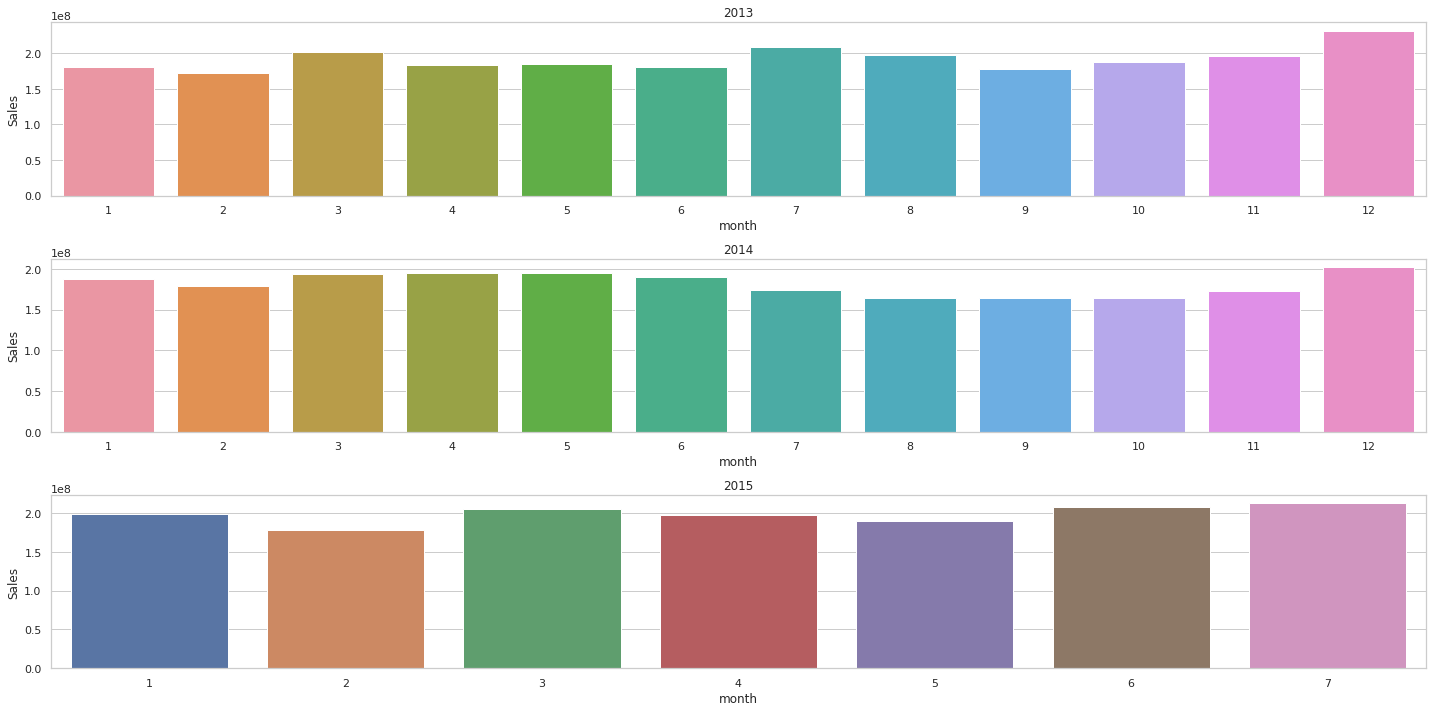

In [178]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes[0].set_title('2013')
sns.barplot(ax=axes[0], data=temp1, x='month', y='Sales')
axes[1].set_title('2014')
sns.barplot(ax=axes[1], data=temp2,x='month', y='Sales')
axes[2].set_title('2015')
sns.barplot(ax=axes[2], data=temp3, x='month', y='Sales')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To know the sales of the store for specific year and its respective month.

##### 2. What is/are the insight(s) found from the chart?

1. For year 2013 sales was highest in december and least in february.
2. For year 2014 sales was highest in december and least in august.
3. For year 2015 sales was highest in july and there were no sales for the month august,september,october,november and december.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help in knowing which year and its month gained most sales and least sales.

#### Chart - 3 - Month vs Sales

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


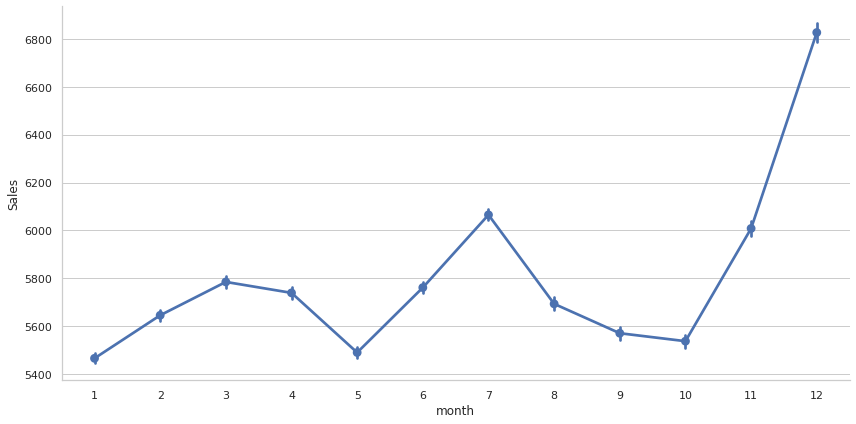

In [179]:
# Chart - 3 visualization code
sns.factorplot(x="month" ,y = "Sales" , data=df1, kind="point", aspect=2,size=6)

##### 1. Why did you pick the specific chart?

Sales of every month is depicted here.

##### 2. What is/are the insight(s) found from the chart?

Sales in winter i.e November and December is climbs up.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Sales in the month January, May, October decreases significantly.

#### Chart - 4 - Yearly Sales (To be dropped)

   year       Sales
0  2013  2302876084
1  2014  2180804896
2  2015  1389499643


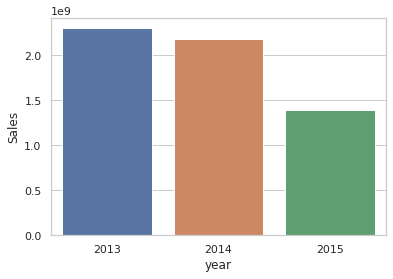

In [180]:
# Chart - 4 visualization code
#Yearwise
result=df1.groupby(['year'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'year', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 - Montly Sales(To be dropped)

    month      Sales
0       1  566728724
1       2  528734410
2       3  599831906
3       4  575895295
4       5  569248217
5       6  578112775
6       7  595059205
7       8  361791202
8       9  342570131
9      10  351878728
10     11  369498877
11     12  433831153


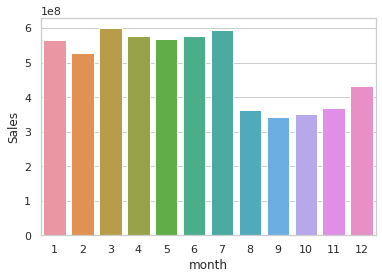

In [181]:
# Chart - 5 visualization code
#MonthWise
result = df1.groupby(['month'],as_index=False).agg({'Sales':"sum"})
print(result)
# plot the result
sns.barplot(x = 'month', y = 'Sales',data=result)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - School holiday

In [182]:
dff.SchoolHoliday.value_counts()
#As we can see 0 has more counts.So, it'll mean 0 implies school is open and 1 implies school is closed.

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

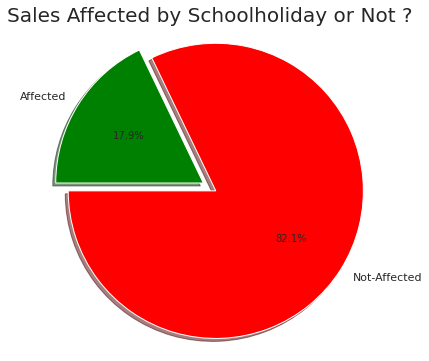

In [183]:
# Chart - 6 visualization code
labels = 'Not-Affected' , 'Affected'
sizes = dff.SchoolHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 State holiday (This column has to be remvoed since it is not affecting the sales much)

In [184]:
# Chart - 7 visualization code
dff.StateHoliday.value_counts()
#0->No holidays and a,b,c->Different types holidays

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [185]:
dff["StateHoliday"] = dff["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
dff.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

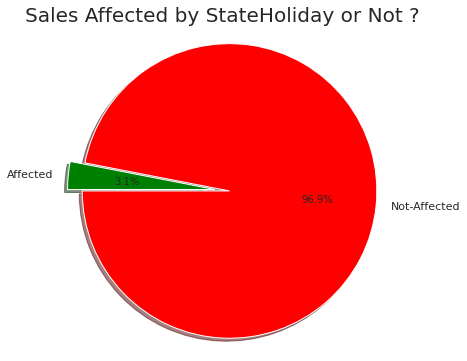

In [186]:
labels = 'Not-Affected' , 'Affected'
sizes = dff.StateHoliday.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by StateHoliday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [187]:
dff.drop('StateHoliday',axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8- Promo

In [188]:
dff.Promo.value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

Text(0.5, 0, 'Promo')

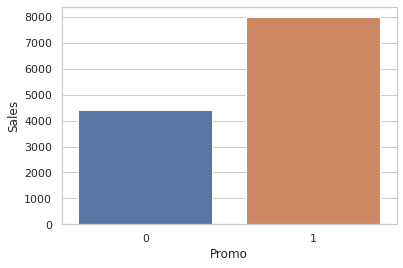

In [189]:
# Chart - 8 visualization code
promo=dff.groupby(['Promo'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo.index, y = promo['Sales'])
plt.xlabel('Promo')
#0->No Promotion, 1-Promotion

In [190]:
dff.Promo2.value_counts()

1    509178
0    508031
Name: Promo2, dtype: int64

Text(0.5, 0, 'Promo2')

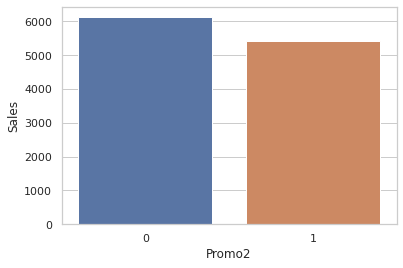

In [191]:
promo2=dff.groupby(['Promo2'],as_index=False).agg({'Sales':'mean'})
sns.barplot(x=promo2.index, y = promo2['Sales'])
plt.xlabel('Promo2')
#0->No Promotion, 1-Promotion

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9- Types of Stores

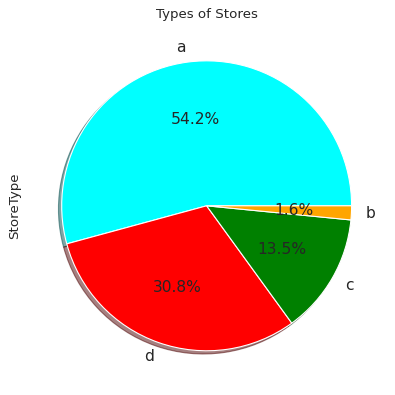

In [192]:
# Chart - 11 visualization code
plt.figure(figsize=(10,7), dpi=80)

dff['StoreType'].value_counts().plot(kind='pie',autopct='%1.1f%%', colors = ['cyan','red', 'green','orange'],startangle=360,fontsize=14,shadow=True)
plt.title("Types of Stores")
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

In [193]:
dff["StoreType"] = dff["StoreType"].map({"a": 0, "b": 1, "c": 2,"d":3})

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10- Different Sales chart

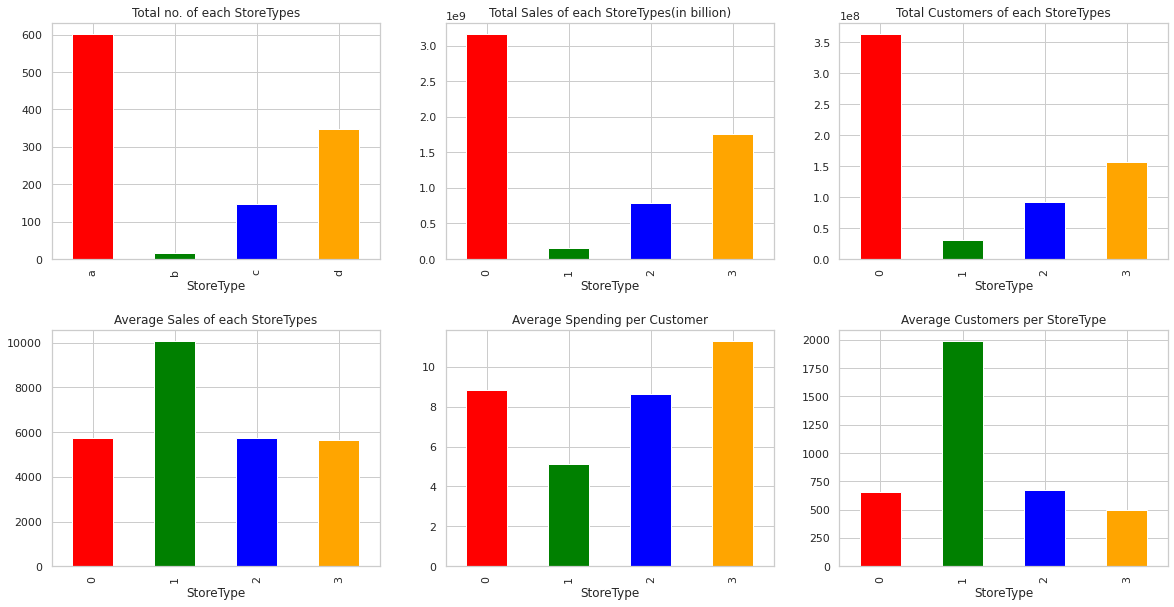

In [194]:
# Chart - 9 visualization code

dff["Avg_Customer_Sales"] = df.Sales/df.Customers
f, ax = plt.subplots(2, 3, figsize = (20,10))

color=[ 'red', 'green', 'blue', 'orange']

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total no. of each StoreTypes",color=color)
dff.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of each StoreTypes(in billion)",color=color)
dff.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total Customers of each StoreTypes",color=color)
dff.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of each StoreTypes",color=color)
dff.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer",color=color)
dff.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType",color=color)

plt.subplots_adjust(hspace = 0.3)
plt.show()


In [195]:
dff.drop('Avg_Customer_Sales',axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11 - Assortment

,StoreType,Assortment,Sales
0,0,a,346389
1,0,c,205238
2,1,a,6594
3,1,b,8294
4,1,c,942
5,2,a,70878
6,2,c,65962
7,3,a,113584
8,3,c,199328


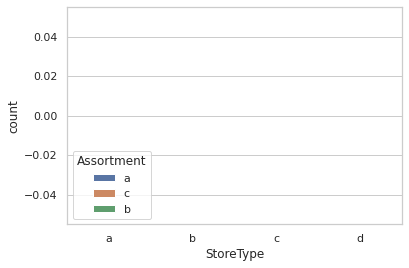

In [196]:
# Chart - 10 visualization code
temp=dff.groupby(['StoreType','Assortment'],as_index=False).agg({'Sales':'count'})
sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=dff)
temp

In [197]:
dff["Assortment"] = dff["Assortment"].map({"a": 0, "b": 1, "c": 2})
print(dff['Assortment'].dtype,dff['Assortment'].unique())

int64 [0 2 1]


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Customer vs Sales

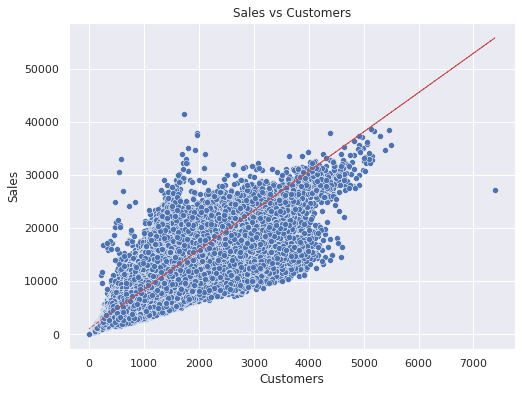

In [198]:
# Chart - 12 visualization code
sns.set(rc={"figure.figsize": (8, 6)})
ax= sns.scatterplot(data=dff, x="Customers", y="Sales", palette ='bright').set_title("Sales vs Customers")
z = np.polyfit(dff['Customers'], dff['Sales'], 1)
y = np.poly1d(z)(dff['Customers'])
plt.plot(dff['Customers'], y, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13 - Promotion

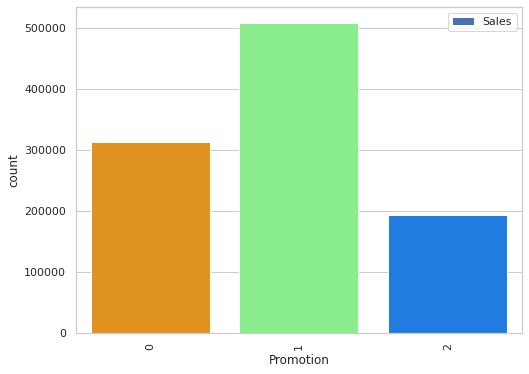

In [199]:
# Chart - 13 visualization code
sns.set_style("whitegrid")
dff['Promotion']=dff['Promo']+dff['Promo2']
dff.groupby(['Promotion']).agg({'Sales':'count'}).plot.bar()
sns.countplot(x="Promotion", data=dff,palette='jet_r')

In [200]:
dff.drop(['Promo','Promo2'],axis=1,inplace=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

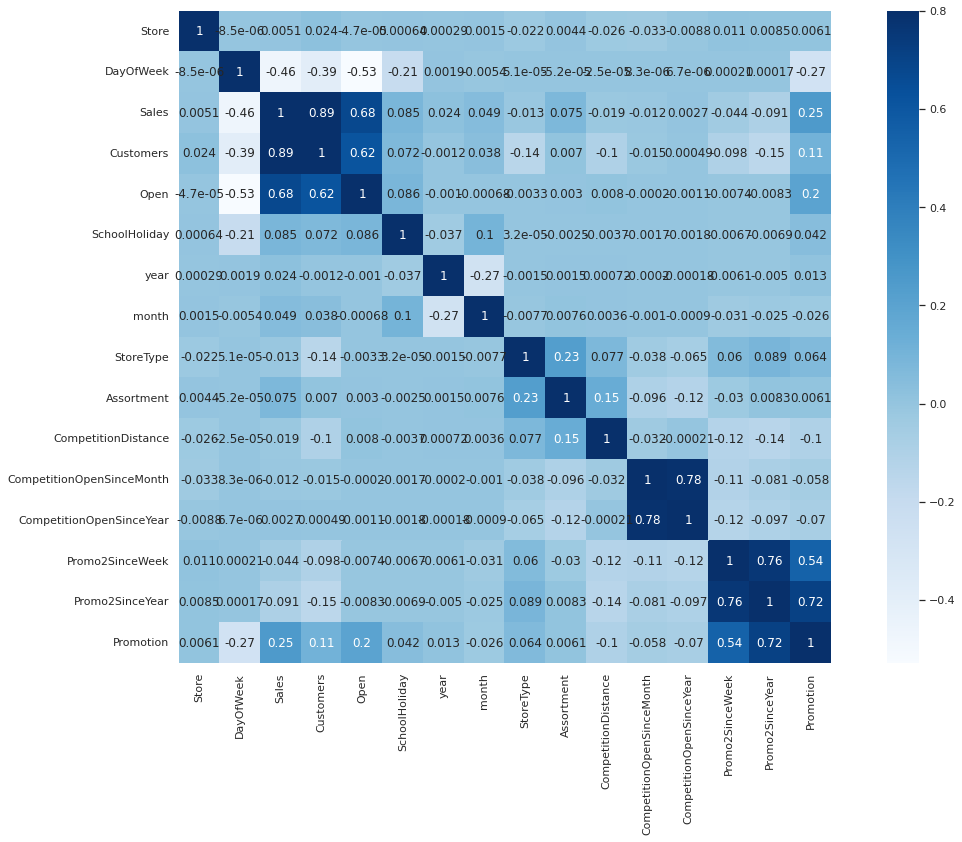

In [201]:
# Correlation Heatmap visualization code
#correlation matrix
corrmat = dff.corr()
h, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corrmat, vmax=.8, square=True , cmap="Blues",annot=True);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [202]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
new_df=dff[['Store','DayOfWeek','Sales','Customers','StoreType','Assortment']].copy()

In [203]:
#pp=sns.pairplot(new_df)
#pp.fig.set_size_inches(10,10);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


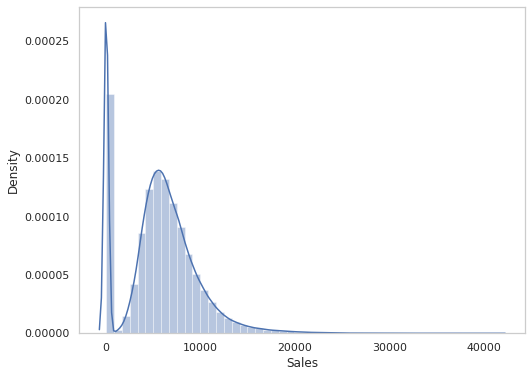

In [204]:
sns.distplot(dff['Sales'],hist=True)

In [205]:
temp=dff.copy()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


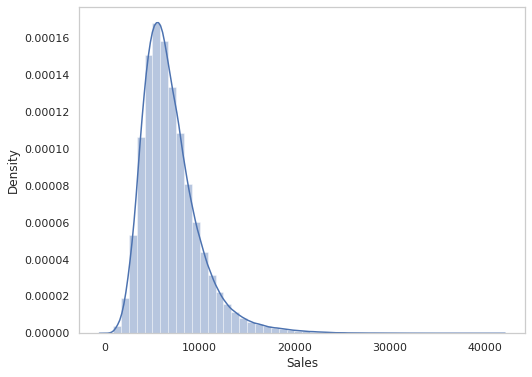

In [206]:
temp=temp[temp['Sales']!=0]
sns.distplot(temp['Sales'],hist=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


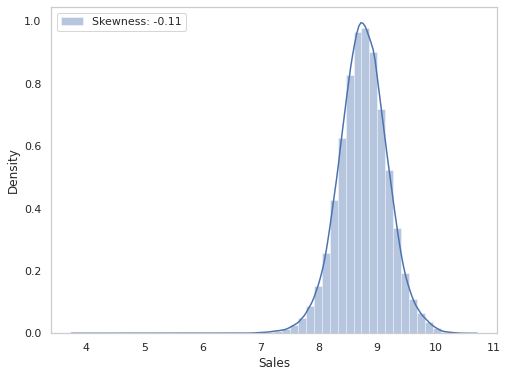

In [207]:
Log_Fare = temp['Sales'].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.distplot(Log_Fare,label="Skewness: %.2f"%(Log_Fare.skew()) )
t.legend()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [208]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [209]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [210]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [211]:
# Handling Missing Values & Missing Value Imputation
print(dff[dff.CompetitionOpenSinceMonth==0].shape[0]*100/dff['CompetitionOpenSinceMonth'].shape[0],'%')
print(dff[dff.CompetitionOpenSinceYear==0].shape[0]*100/dff['CompetitionOpenSinceYear'].shape[0],'%')
#CompetitionOpenSinceMonth and CompetitionOpenSinceYear has around 32% null values

31.787764363075826 %
31.787764363075826 %


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa1eff55340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa1eff55a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa1eff64e80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1eff4a0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1eff4a3a0>],
 'means': []}

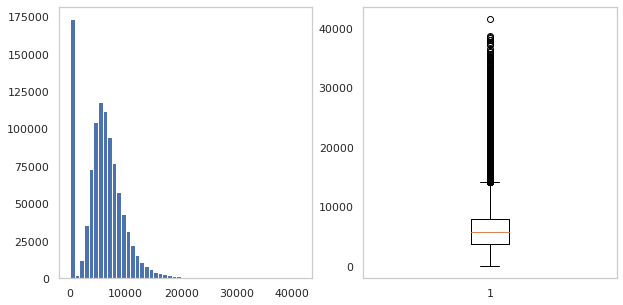

In [212]:
# Handling Outliers & Outlier treatments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.hist(dff['Sales'], bins=50)
ax2.boxplot(dff['Sales'])

In [213]:
mod_df = dff.drop(dff[(dff.Open == 0) & (dff.Sales == 0)].index)

In [214]:
print(dff.shape[0])
mod_df.shape[0]

1017209


844392

In [215]:
mod_df.drop('Open',axis=1,inplace=True)

In [216]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   SchoolHoliday              844392 non-null  int64  
 6   year                       844392 non-null  int64  
 7   month                      844392 non-null  int64  
 8   StoreType                  844392 non-null  int64  
 9   Assortment                 844392 non-null  int64  
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2SinceWeek            8

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


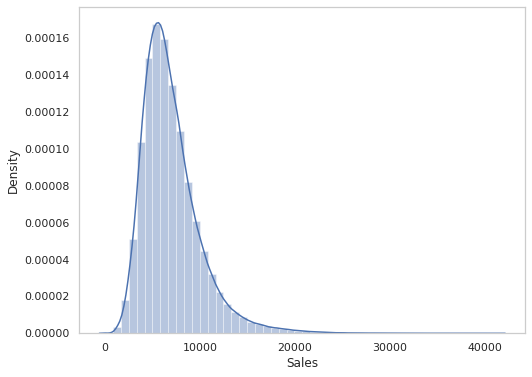

In [217]:
sns.distplot(mod_df['Sales'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

In [218]:
mod_df[mod_df.Promo2SinceWeek==0].shape[0]/mod_df['Promo2SinceWeek'].value_counts().sum()

0.5013157396090915

### 3. Categorical Encoding

In [219]:
# Encode your categorical columns
mod_df = pd.get_dummies(mod_df, columns=['PromoInterval'])
mod_df.head()

,Store,DayOfWeek,Date,Sales,Customers,SchoolHoliday,year,month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,Promotion,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,2015,7,2,0,1270.0,9.0,2008.0,0.0,0.0,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,2015,7,0,0,570.0,11.0,2007.0,13.0,2010.0,2,0,0,1,0
2,3,5,2015-07-31,8314,821,1,2015,7,0,0,14130.0,12.0,2006.0,14.0,2011.0,2,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,2015,7,2,2,620.0,9.0,2009.0,0.0,0.0,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,2015,7,0,0,29910.0,4.0,2015.0,0.0,0.0,1,1,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [220]:
# Expand Contraction

#### 2. Lower Casing

In [221]:
# Lower Casing

#### 3. Removing Punctuations

In [222]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [223]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [224]:
# Remove Stopwords

In [225]:
# Remove White spaces

#### 6. Rephrase Text

In [226]:
# Rephrase Text

#### 7. Tokenization

In [227]:
# Tokenization

#### 8. Text Normalization

In [228]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [229]:
# POS Taging

#### 10. Text Vectorization

In [230]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [231]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [232]:
# Select your features wisely to avoid overfitting

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(mod_df[[i for i in mod_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.005192e+00
1,DayOfWeek,1.114832e+00
2,Customers,1.172438e+00
3,SchoolHoliday,1.034204e+00
4,year,1.079046e+00
5,month,1.096676e+00
6,StoreType,1.111493e+00
7,Assortment,1.110665e+00
8,CompetitionDistance,1.092491e+00
9,CompetitionOpenSinceMonth,2.652490e+00


In [234]:
calc_vif(mod_df[[i for i in mod_df.describe().columns if i not in ['Sales','Promo2SinceYear','year','PromoInterval_0','CompetitionOpenSinceYear']]])

,variables,VIF
0,Store,3.539183
1,DayOfWeek,4.171344
2,Customers,4.185291
3,SchoolHoliday,1.264200
4,month,3.714865
5,StoreType,1.883419
6,Assortment,2.056215
7,CompetitionDistance,1.524037
8,CompetitionOpenSinceMonth,2.157586
9,Promo2SinceWeek,3.762245


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [235]:
# Transform Your data

### 6. Data Scaling

In [236]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [237]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [238]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [239]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [97]:
import math
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

#### LINEAR REGRESSION

In [243]:
# ML Model - 1 Implementation
X=mod_df.drop(['Sales','Promo2SinceYear','year','Date','PromoInterval_0','CompetitionOpenSinceYear'],axis=1)
y=mod_df['Sales']
# Fit the Algorithm
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
# Predict on the model
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

(675513, 14)
(168879, 14)


0.7628248844632084

In [99]:
X.columns

Index(['Store', 'DayOfWeek', 'Customers', 'SchoolHoliday', 'month',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2SinceWeek', 'Promotion',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [100]:
reg.intercept_

803.6430388005383

In [101]:
reg.coef_

array([-1.57394409e-01, -6.86551289e+01,  6.34818109e+00,  3.27000610e+01,
        2.99264459e+01,  2.75197966e+02,  2.18373197e+02,  2.90387583e-02,
        1.29898880e+01,  1.22925376e+01,  1.29786937e+03, -1.36232649e+03,
       -1.24002605e+03, -1.60703132e+03])

In [102]:
y_pred=reg.predict(X_test)
y_pred

array([5313.9230969 , 4754.39941903, 7170.60183565, ..., 4012.68639751,
       7813.99491568, 5424.52429978])

In [103]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([5416.13270345, 6712.16146354, 6733.99648513, ..., 7842.51788919,
       6932.07284205, 6048.84501834])

In [104]:
y_test

123995     5495
969320     5472
24758      7969
785700     7384
427162    13212
          ...  
928329    16337
981707     9195
144715     2938
573284    10413
328700     5828
Name: Sales, Length: 168879, dtype: int64

In [105]:
y_train

340381    5409
921364    7339
545501    7807
994682    7964
857291    2896
          ... 
431396    9037
183529    6196
143644    4817
525999    6194
367759    5862
Name: Sales, Length: 675513, dtype: int64

In [106]:
print('Mean Squared Error=',mse(y_test, y_pred))
print('Root Mean Squared Error=',math.sqrt(mse(y_test, y_pred)))

Mean Squared Error= 2272732.9043688267
Root Mean Squared Error= 1507.5585906918598


In [107]:
r2_score(y_test,y_pred)

0.7627262123598313

In [108]:
train_score_1=reg.score(X_train,y_train)
train_score_2=reg.score(X_test,y_test)
print(train_score_1,train_score_2)

0.7628248844632084 0.7627262123598313


In [109]:
#predictions 
y_pred = reg.predict(X_test)
d={'Actual Sale':y_test,'Predicted Sales':y_pred}
x=pd.DataFrame(d)
x.head()

,Actual Sale,Predicted Sales
123995,5495,5313.923097
969320,5472,4754.399419
24758,7969,7170.601836
785700,7384,6127.356066
427162,13212,7822.323135


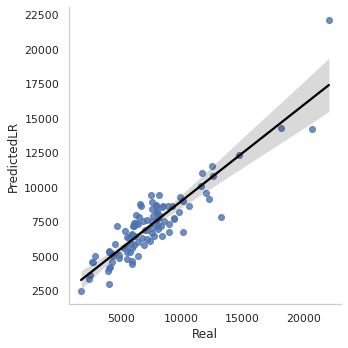

In [110]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

#### LASSO AND RIDGE

In [111]:
#LASSO
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

#score
print('Lasso Training score =',lasso_cv.score(X_train, y_train))
print('Lasso Testing score =',lasso_cv.score(X_test, y_test))

Lasso Training score = 0.7628248844630207
Lasso Testing score = 0.7627262133527091


In [112]:
#RIDGE
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1,0.5, 1, 10]).fit(X_train, y_train)

#score
print("Ridge training score = {}".format(ridge_cv.score(X_train, y_train)))
print("Ridge testing score = {}".format(ridge_cv.score(X_test, y_test)))

Ridge training score = 0.7628245635233102
Ridge testing score = 0.7627255267243246


#### DECISION TREE

In [251]:
dt=DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(dt.score(X_train,y_train),'\n',dt.score(X_test,y_test))

0.785169678510834 
 0.7858823472082516


In [252]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mae=mean_absolute_error(y_test,y_pred_dt)
mape=mean_absolute_percentage_error(y_test,y_pred_dt)
msqe=mse(y_test,y_pred_dt)
rmsqe=np.sqrt(msqe)
r2=r2_score(y_test,y_pred_dt)
dt_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt_metric)

                     0
MAE       1.036893e+03
MAPE      5.384346e+14
MSE       2.050931e+06
RMSE      1.432107e+03
R2 SCORE  7.858823e-01


In [115]:
#predictions 
y_pred_dt = dt.predict(X_test)
d={'Actual Sales':y_test,'Predicted Sales':y_pred_dt}
x=pd.DataFrame(d)
print("Decision Tree")
x.head()

Decision Tree


,Actual Sales,Predicted Sales
123995,5495,5276.267975
969320,5472,5276.267975
24758,7969,6771.722956
785700,7384,6771.722956
427162,13212,10389.571615


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [116]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [117]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#another script that takes toooo long, to find the right parameters for tree
#tree = DecisionTreeRegressor()

#params = {'min_samples_split':[2,3,5,7],'min_samples_leaf':[6,8,10],}

#grid = RandomizedSearchCV(estimator=tree,param_distributions=params,verbose=True,cv=10)
# choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

#grid.fit(X_train, y_train)
#print(grid.best_params_)
#Best parameter {'min_samples_split': 3, 'min_samples_leaf': 6}


In [118]:
# Fit the Algorithm
tree = DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=6)
tree.fit(X_train,y_train)
print('Model Training score =',tree.score(X_train,y_train),'\n Model Test score',tree.score(X_test,y_test))
# Predict on the model
y_pred_dth=tree.predict(X_test)
mae=mean_absolute_error(y_test,y_pred_dth)
mape=mean_absolute_percentage_error(y_test,y_pred_dth)
msqe=mse(y_test,y_pred_dth)
rmsqe=np.sqrt(msqe)
r2=r2_score(y_test,y_pred_dth)
dt_update_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt_update_metric)

Model Training score = 0.979577676653759 
 Model Test score 0.9608955372856804
                      0
MAE          401.891191
MAPE           0.058760
MSE       374563.073327
RMSE         612.015583
R2 SCORE       0.960896


In [119]:
#predictions 
d={'Actual Sales':y_test,'Predicted Sales':y_pred_dt,'Predicted Sales with tuning':y_pred_dth}
x=pd.DataFrame(d)
print("Decision Tree with Hyper parameter tuning")
x.head()

Decision Tree with Hyper parameter tuning


,Actual Sales,Predicted Sales,Predicted Sales with tuning
123995,5495,5276.267975,5159.142857
969320,5472,5276.267975,5737.285714
24758,7969,6771.722956,7672.000000
785700,7384,6771.722956,7069.000000
427162,13212,10389.571615,12374.000000


In [120]:
x['Actual-Predicted']=abs(x['Actual Sales']-x['Predicted Sales'])
x['Actual-Predicted(Tuned)']=abs(x['Actual Sales']-x['Predicted Sales with tuning'])
x.head()

,Actual Sales,Predicted Sales,Predicted Sales with tuning,Actual-Predicted,Actual-Predicted(Tuned)
123995,5495,5276.267975,5159.142857,218.732025,335.857143
969320,5472,5276.267975,5737.285714,195.732025,265.285714
24758,7969,6771.722956,7672.000000,1197.277044,297.000000
785700,7384,6771.722956,7069.000000,612.277044,315.000000
427162,13212,10389.571615,12374.000000,2822.428385,838.000000


In [121]:
(x['Actual-Predicted'].sum()/x['Actual Sales'].sum())*100

14.919619521970107

In [122]:
(x['Actual-Predicted(Tuned)'].sum()/x['Actual Sales'].sum())*100

5.78272207841434

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [123]:
print('Decision Tree')
print(dt_metric)
print('\nDecision Tree with Hyperparameter tuning')
print(dt_update_metric)

Decision Tree
                     0
MAE       1.036893e+03
MAPE      5.384346e+14
MSE       2.050931e+06
RMSE      1.432107e+03
R2 SCORE  7.858823e-01

Decision Tree with Hyperparameter tuning
                      0
MAE          401.891191
MAPE           0.058760
MSE       374563.073327
RMSE         612.015583
R2 SCORE       0.960896


Answer Here.

#### RANDOM FOREST

In [ ]:
'''#another script that takes toooo long, to find the right parameters for RFR
rfr=RandomForestRegressor(n_jobs=-1)
params = {'n_estimators':[40,50,60,70,80],'min_samples_split':[2,3,6],'min_samples_leaf':[1,2,3],'max_depth':[None,5,10]}

#the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option than GridSearchCV
grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

#choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
grid.fit(X_train, y_train)
grid.best_params_'''

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

In [126]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)
rdf_pred=rdf.predict(X_test)
print(rdfreg.score(X_train, y_train))
print(rdfreg.score(X_test, y_test))

0.9960429995551398
0.972949939063958


In [127]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted DT':y_pred_dt,'Predicted Sales':rdf_pred})
print(temp_df)

        Actual  Predicted DT  Predicted Sales
123995    5495   5276.267975      5204.003125
969320    5472   5276.267975      5673.087500
24758     7969   6771.722956      7695.175000
785700    7384   6771.722956      7491.275000
427162   13212  10389.571615     12555.309375
...        ...           ...              ...
928329   16337  17834.875605     15884.712500
981707    9195  10389.571615      9183.512500
144715    2938   4297.172633      2927.950000
573284   10413   7949.305163      9648.937500
328700    5828   5437.865189      6090.750000

[168879 rows x 3 columns]


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [240]:
dff.drop(['Date','Store','year','month'],axis=1,inplace=True)
dff = pd.get_dummies(dff, columns=['PromoInterval'])

In [241]:
# Visualizing evaluation Metric Score chart
X2=dff.drop('Sales',axis=1)
y2=dff['Sales']

####LINEAR REGRESSION

In [244]:
# Fit the Algorithm
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state = 0)
print(X2_train.shape)
print(X2_test.shape)
# Predict on the model
reg2 = LinearRegression().fit(X2_train, y2_train)
reg2.score(X2_train, y2_train)

(813767, 16)
(203442, 16)


0.8668884250057609

####DECISION TREE

In [248]:
dt2=DecisionTreeRegressor(max_depth=5)
dt2.fit(X2_train,y2_train)
y2_pred_dt=dt2.predict(X2_test)
print(dt2.score(X2_train,y2_train),'\n',dt2.score(X2_test,y2_test))

0.8692913879508066 
 0.867912087088838


In [253]:
mae=mean_absolute_error(y2_test,y2_pred_dt)
mape=mean_absolute_percentage_error(y2_test,y2_pred_dt)
msqe=mse(y2_test,y2_pred_dt)
rmsqe=np.sqrt(msqe)
r2=r2_score(y2_test,y2_pred_dt)
dt_metric2=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt_metric2)

                     0
MAE       9.139151e+02
MAPE      1.668110e+12
MSE       1.951828e+06
RMSE      1.397078e+03
R2 SCORE  8.679121e-01


#### 2. Cross- Validation & Hyperparameter Tuning

In [255]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#another script that takes toooo long, to find the right parameters for tree
#tree2 = DecisionTreeRegressor()

#params2 = {'min_samples_split':[2,3,5,7],'min_samples_leaf':[6,8,10],}

#grid = RandomizedSearchCV(estimator=tree2,param_distributions=params2,verbose=True,cv=10)
# choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
#grid.fit(X2_train, y2_train)
#print(grid.best_params_)
#{'min_samples_split': 3, 'min_samples_leaf': 6}

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'min_samples_split': 3, 'min_samples_leaf': 6}


In [257]:
# Fit the Algorithm
tree2 = DecisionTreeRegressor(min_samples_split=3, min_samples_leaf=6)
tree2.fit(X2_train,y2_train)
print('Model Training score =',tree2.score(X2_train,y2_train),'\n Model Test score',tree2.score(X2_test,y2_test))
# Predict on the model
y2_pred_dth=tree2.predict(X2_test)
mae=mean_absolute_error(y2_test,y2_pred_dth)
mape=mean_absolute_percentage_error(y2_test,y2_pred_dth)
msqe=mse(y2_test,y2_pred_dth)
rmsqe=np.sqrt(msqe)
r2=r2_score(y2_test,y2_pred_dth)
dt2_update_metric=pd.DataFrame([mae,mape,msqe,rmsqe,r2],index=['MAE','MAPE','MSE','RMSE','R2 SCORE'])
print(dt2_update_metric)

Model Training score = 0.9882353526199854 
 Model Test score 0.9784018631716674
                      0
MAE          334.788784
MAPE           0.048694
MSE       319149.974909
RMSE         564.933602
R2 SCORE       0.978402


In [258]:
print(dt_update_metric)

                      0
MAE          401.891191
MAPE           0.058760
MSE       374563.073327
RMSE         612.015583
R2 SCORE       0.960896


In [259]:
#predictions 
d2={'Actual Sales':y2_test,'Predicted Sales':y2_pred_dt,'Predicted Sales with tuning':y2_pred_dth}
x2=pd.DataFrame(d2)
print("Decision Tree with Hyper parameter tuning")
x2.head()

Decision Tree with Hyper parameter tuning


,Actual Sales,Predicted Sales,Predicted Sales with tuning
982497,7285,7651.377499,7247.333333
719065,6221,10731.775506,6483.142857
145542,8132,9096.411096,7704.111111
252177,20916,11835.110635,17929.454545
479489,5472,5476.684725,5404.571429


In [ ]:
x2['Actual-Predicted']=abs(x2['Actual Sales']-x2['Predicted Sales'])
x2['Actual-Predicted(Tuned)']=abs(x2['Actual Sales']-x2['Predicted Sales with tuning'])
x2.head()

,Actual Sales,Predicted Sales,Predicted Sales with tuning,Actual-Predicted,Actual-Predicted(Tuned)
982497,7285,7651.377499,7247.333333,366.377499,37.666667
719065,6221,10731.775506,6483.142857,4510.775506,262.142857
145542,8132,9096.411096,7704.111111,964.411096,427.888889
252177,20916,11835.110635,17929.454545,9080.889365,2986.545455
479489,5472,5476.684725,5404.571429,4.684725,67.428571


In [262]:
(x2['Actual-Predicted'].sum()/x2['Actual Sales'].sum())*100

15.815445075081339

In [264]:
(x2['Actual-Predicted(Tuned)'].sum()/x2['Actual Sales'].sum())*100

5.79357248442571

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***